In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install pandas


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas as pd

# Veri dosyasının yolu
file_path = "/content/drive/MyDrive/data/secondary_data.csv"

# Veriyi okuma
data = pd.read_csv(file_path, header=None)

In [7]:
import pandas as pd

# Veri dosyasının yolu
file_path = "/content/drive/MyDrive/data/agaricus-lepiota.data"

# Veriyi okuma
data = pd.read_csv(file_path, header=None)

In [8]:
# ilk 5 satırı görüntüleme
print(data.head())

# özniteliklerin isimlerini atama
data.columns = ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']

# veri setinin boyutunu görüntüleme
print(data.shape)

# veri setindeki her öznitelikteki benzersiz değerlerin sayısını görüntüleme
for col in data.columns:
    print(col, len(data[col].unique()))

  0  1  2  3  4  5  6  7  8  9   ... 13 14 15 16 17 18 19 20 21 22
0  p  x  s  n  t  p  f  c  n  k  ...  s  w  w  p  w  o  p  k  s  u
1  e  x  s  y  t  a  f  c  b  k  ...  s  w  w  p  w  o  p  n  n  g
2  e  b  s  w  t  l  f  c  b  n  ...  s  w  w  p  w  o  p  n  n  m
3  p  x  y  w  t  p  f  c  n  n  ...  s  w  w  p  w  o  p  k  s  u
4  e  x  s  g  f  n  f  w  b  k  ...  s  w  w  p  w  o  e  n  a  g

[5 rows x 23 columns]
(8124, 23)
class 2
cap-shape 6
cap-surface 4
cap-color 10
bruises 2
odor 9
gill-attachment 2
gill-spacing 2
gill-size 2
gill-color 12
stalk-shape 2
stalk-root 5
stalk-surface-above-ring 4
stalk-surface-below-ring 4
stalk-color-above-ring 9
stalk-color-below-ring 9
veil-type 1
veil-color 4
ring-number 3
ring-type 5
spore-print-color 9
population 6
habitat 7


In [ ]:
# eksik değerleri "?" ile doldurma
data = data.replace('?', pd.np.nan)

# eksik değerleri içeren satırları veri setinden kaldırma
data = data.dropna()

# "class" özniteliğini etiket olarak ayırma
labels = data['class']
data = data.drop('class', axis=1)

# kategorik öznitelikleri sayısal değerlere dön


<ipython-input-6-463acb3ea59d>:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  data = data.replace('?', pd.np.nan)


In [ ]:
from sklearn.model_selection import train_test_split

# veri setini eğitim ve test setlerine ayırma (veri setinin %20'si test seti olarak ayrılır)
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)


In [ ]:
import pandas as pd

# veri setindeki kategorik değişkenleri sayısal verilere dönüştürme
data = pd.get_dummies(data)

# veri setini eğitim ve test setlerine ayırma
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Random Forest sınıflandırma modelini oluşturma ve eğitme
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# test setindeki verileri kullanarak modelin performansını ölçme
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# performans ölçütlerini ekrana yazdırma
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_mat)
print("Classification Report:\n", class_report)


Accuracy: 1.0
Confusion Matrix:
 [[705   0]
 [  0 424]]
Classification Report:
               precision    recall  f1-score   support

           e       1.00      1.00      1.00       705
           p       1.00      1.00      1.00       424

    accuracy                           1.00      1129
   macro avg       1.00      1.00      1.00      1129
weighted avg       1.00      1.00      1.00      1129



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest sınıflandırma modelini oluşturma ve eğitme
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

<Axes: >

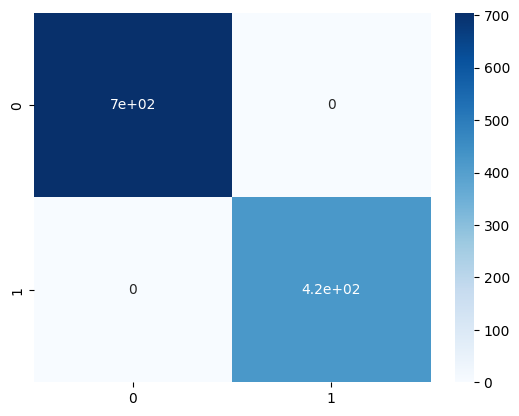

In [ ]:
import seaborn as sns

# Confusion Matrix'i görselleştirme
sns.heatmap(confusion_mat, annot=True, cmap="Blues")


In [ ]:
!pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install scikit-plot


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install --upgrade scikit-plot


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

from sklearn.metrics import classification_report

# Sınıflandırma Raporunu gösterme
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           e       1.00      1.00      1.00       705
           p       1.00      1.00      1.00       424

    accuracy                           1.00      1129
   macro avg       1.00      1.00      1.00      1129
weighted avg       1.00      1.00      1.00      1129



In [ ]:
!pip install graphviz


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import graphviz 

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

dot_data = tree.export_graphviz(dtc, out_file=None, 
                      feature_names=X.columns,  
                      class_names=y.unique(),  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph


NameError: ignored